In [47]:
import os
os.chdir("/Users/Clair/machine_learning_sp20")

In [48]:
import numpy as np
import pandas as pd
import keras

from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling
import pathlib

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [15]:
#################################################################
# DATASET #2
# Forest Fires
# -Regression
# -Label Encoding
#################################################################

In [66]:
# READ IN DATA
fire_columns = ["x_coord", "y_coord", "month", "day", "ffmc", "dmc", "dc", 
                  "isi", "temp", "rel_humid", "wind", "rain",
                 "area"]
fire_data = pd.read_csv("forestfires.csv", names=fire_columns, header=None)
fire_data = fire_data[fire_data['area'] !=0]

In [67]:
# ENCODE STRING DATA
fire_data["month_num"] = fire_data.month.map({"jan": 1, "feb": 2, "mar": 3, "apr": 4, "may": 5, "jun": 6, 
                                              "jul": 7, "aug": 8, "sep": 9, "oct": 10, "nov": 11, "dec": 12})

fire_data["week_day_num"] = fire_data.day.map({"sun": 1, "mon": 2, "tue": 3, "wed": 4, "thu": 5, "fri": 6, "sat":7})

fire_data = fire_data.drop(columns=["month", "day"])


In [68]:
fire_targets = fire_data["area"]
fire_data = fire_data.drop(columns=["area"])
fire_data

,x_coord,y_coord,ffmc,dmc,dc,isi,temp,rel_humid,wind,rain,month_num,week_day_num
138,9,9,85.8,48.3,313.4,3.9,18.0,42,2.7,0.0,7,3
139,1,4,91.0,129.5,692.6,7.0,21.7,38,2.2,0.0,9,3
140,2,5,90.9,126.5,686.5,7.0,21.9,39,1.8,0.0,9,2
141,1,2,95.5,99.9,513.3,13.2,23.3,31,4.5,0.0,8,4
142,8,6,90.1,108.0,529.8,12.5,21.2,51,8.9,0.0,8,6
...,...,...,...,...,...,...,...,...,...,...,...,...
509,5,4,91.0,166.9,752.6,7.1,21.1,71,7.6,1.4,8,6
510,6,5,91.0,166.9,752.6,7.1,18.2,62,5.4,0.0,8,6
512,4,3,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,8,1
513,2,4,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,8,1


In [81]:
train_data, test_data, train_targets, test_targets = train_test_split(fire_data, fire_targets, 
                                                                      test_size = 0.3, shuffle = True)


In [90]:
classifier = Sequential()
classifier.add(Dense(activation="relu", input_dim=12, units=6, kernel_initializer="uniform"))
#Hidden layer
classifier.add(Dense(activation="sigmoid", units=6, kernel_initializer="uniform"))
classifier.add(Dense(activation="sigmoid", units=3, kernel_initializer="uniform"))


#output layer with 1 output neuron which will predict 1 or 0
classifier.add(Dense(activation="sigmoid", units=1, kernel_initializer="uniform"))

In [94]:
# Compile model
classifier.compile(loss=keras.losses.MeanSquaredError(), optimizer=keras.optimizers.RMSprop(), metrics=['mean_absolute_error'])

# Fit the model
ep = 500
history = classifier.fit(train_data, train_targets,
                    epochs=ep,
                    validation_data=(test_data, test_targets))

Train on 189 samples, validate on 81 samples
Epoch 1/500
189/189 [==============================] - 0s 464us/step - loss: 10543.4094 - mean_absolute_error: 24.9210 - val_loss: 2149.6474 - val_mean_absolute_error: 21.5843
Epoch 2/500
189/189 [==============================] - 0s 53us/step - loss: 10543.0705 - mean_absolute_error: 24.9168 - val_loss: 2149.3899 - val_mean_absolute_error: 21.5792
Epoch 3/500
189/189 [==============================] - 0s 69us/step - loss: 10542.8128 - mean_absolute_error: 24.9118 - val_loss: 2149.2011 - val_mean_absolute_error: 21.5755
Epoch 4/500
189/189 [==============================] - 0s 69us/step - loss: 10542.6018 - mean_absolute_error: 24.9086 - val_loss: 2149.0180 - val_mean_absolute_error: 21.5719
Epoch 5/500
189/189 [==============================] - 0s 79us/step - loss: 10542.3997 - mean_absolute_error: 24.9046 - val_loss: 2148.8630 - val_mean_absolute_error: 21.5688
Epoch 6/500
189/189 [==============================] - 0s 68us/step - loss: 105

189/189 [==============================] - 0s 84us/step - loss: 10532.1116 - mean_absolute_error: 24.7278 - val_loss: 2140.0364 - val_mean_absolute_error: 21.4074
Epoch 94/500
189/189 [==============================] - 0s 84us/step - loss: 10532.0587 - mean_absolute_error: 24.7269 - val_loss: 2139.9897 - val_mean_absolute_error: 21.4065
Epoch 95/500
189/189 [==============================] - 0s 74us/step - loss: 10532.0099 - mean_absolute_error: 24.7259 - val_loss: 2139.9518 - val_mean_absolute_error: 21.4059
Epoch 96/500
189/189 [==============================] - 0s 90us/step - loss: 10531.9612 - mean_absolute_error: 24.7251 - val_loss: 2139.9090 - val_mean_absolute_error: 21.4051
Epoch 97/500
189/189 [==============================] - 0s 84us/step - loss: 10531.9113 - mean_absolute_error: 24.7244 - val_loss: 2139.8633 - val_mean_absolute_error: 21.4043
Epoch 98/500
189/189 [==============================] - 0s 79us/step - loss: 10531.8648 - mean_absolute_error: 24.7235 - val_loss: 21

189/189 [==============================] - 0s 63us/step - loss: 10529.7885 - mean_absolute_error: 24.6884 - val_loss: 2138.0520 - val_mean_absolute_error: 21.3733
Epoch 186/500
189/189 [==============================] - 0s 63us/step - loss: 10529.7788 - mean_absolute_error: 24.6882 - val_loss: 2138.0440 - val_mean_absolute_error: 21.3731
Epoch 187/500
189/189 [==============================] - 0s 53us/step - loss: 10529.7688 - mean_absolute_error: 24.6881 - val_loss: 2138.0362 - val_mean_absolute_error: 21.3730
Epoch 188/500
189/189 [==============================] - 0s 53us/step - loss: 10529.7607 - mean_absolute_error: 24.6879 - val_loss: 2138.0278 - val_mean_absolute_error: 21.3728
Epoch 189/500
189/189 [==============================] - 0s 63us/step - loss: 10529.7512 - mean_absolute_error: 24.6878 - val_loss: 2138.0201 - val_mean_absolute_error: 21.3727
Epoch 190/500
189/189 [==============================] - 0s 69us/step - loss: 10529.7422 - mean_absolute_error: 24.6876 - val_los

189/189 [==============================] - 0s 79us/step - loss: 10529.3730 - mean_absolute_error: 24.6814 - val_loss: 2137.6971 - val_mean_absolute_error: 21.3672
Epoch 278/500
189/189 [==============================] - 0s 63us/step - loss: 10529.3708 - mean_absolute_error: 24.6814 - val_loss: 2137.6958 - val_mean_absolute_error: 21.3672
Epoch 279/500
189/189 [==============================] - 0s 63us/step - loss: 10529.3704 - mean_absolute_error: 24.6813 - val_loss: 2137.6947 - val_mean_absolute_error: 21.3671
Epoch 280/500
189/189 [==============================] - 0s 58us/step - loss: 10529.3684 - mean_absolute_error: 24.6813 - val_loss: 2137.6932 - val_mean_absolute_error: 21.3671
Epoch 281/500
189/189 [==============================] - 0s 53us/step - loss: 10529.3667 - mean_absolute_error: 24.6813 - val_loss: 2137.6923 - val_mean_absolute_error: 21.3671
Epoch 282/500
189/189 [==============================] - 0s 53us/step - loss: 10529.3651 - mean_absolute_error: 24.6813 - val_los

189/189 [==============================] - 0s 68us/step - loss: 10529.3003 - mean_absolute_error: 24.6802 - val_loss: 2137.6372 - val_mean_absolute_error: 21.3661
Epoch 370/500
189/189 [==============================] - 0s 63us/step - loss: 10529.3002 - mean_absolute_error: 24.6802 - val_loss: 2137.6367 - val_mean_absolute_error: 21.3661
Epoch 371/500
189/189 [==============================] - 0s 69us/step - loss: 10529.3002 - mean_absolute_error: 24.6802 - val_loss: 2137.6367 - val_mean_absolute_error: 21.3661
Epoch 372/500
189/189 [==============================] - 0s 69us/step - loss: 10529.3003 - mean_absolute_error: 24.6802 - val_loss: 2137.6362 - val_mean_absolute_error: 21.3661
Epoch 373/500
189/189 [==============================] - 0s 74us/step - loss: 10529.3000 - mean_absolute_error: 24.6802 - val_loss: 2137.6361 - val_mean_absolute_error: 21.3661
Epoch 374/500
189/189 [==============================] - 0s 74us/step - loss: 10529.2986 - mean_absolute_error: 24.6802 - val_los

189/189 [==============================] - 0s 63us/step - loss: 10529.2888 - mean_absolute_error: 24.6800 - val_loss: 2137.6264 - val_mean_absolute_error: 21.3660
Epoch 462/500
189/189 [==============================] - 0s 63us/step - loss: 10529.2892 - mean_absolute_error: 24.6800 - val_loss: 2137.6264 - val_mean_absolute_error: 21.3660
Epoch 463/500
189/189 [==============================] - 0s 63us/step - loss: 10529.2896 - mean_absolute_error: 24.6800 - val_loss: 2137.6264 - val_mean_absolute_error: 21.3660
Epoch 464/500
189/189 [==============================] - 0s 53us/step - loss: 10529.2896 - mean_absolute_error: 24.6800 - val_loss: 2137.6264 - val_mean_absolute_error: 21.3660
Epoch 465/500
189/189 [==============================] - 0s 47us/step - loss: 10529.2891 - mean_absolute_error: 24.6800 - val_loss: 2137.6264 - val_mean_absolute_error: 21.3660
Epoch 466/500
189/189 [==============================] - 0s 69us/step - loss: 10529.2888 - mean_absolute_error: 24.6800 - val_los

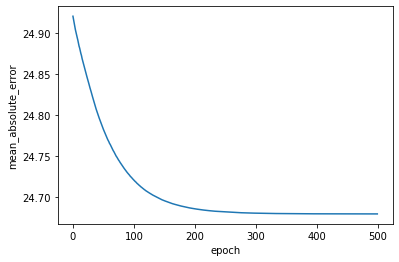

In [95]:
plt.plot(history.history['mean_absolute_error'])
plt.ylabel('mean_absolute_error')
plt.xlabel('epoch')
plt.show()

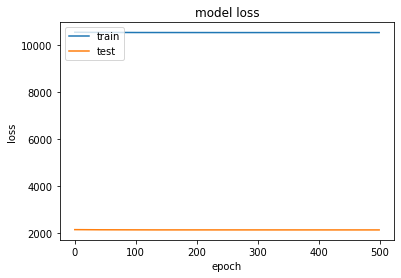

In [97]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()